In [1]:
import osmnx as ox
import networkx as nx
import pandas as pd
import numpy as np
import geopy
%matplotlib inline

Wall time: 23.2 s


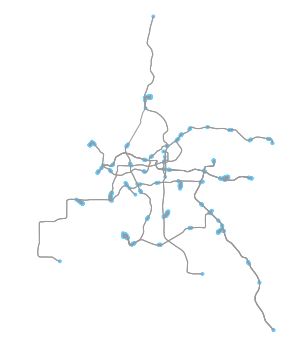

Wall time: 518 ms


In [3]:
#create subwaynetwork
point = (23.1252, 113.2718)
dist = 25000
%time G_metro_gz = ox.graph_from_point(point, distance =dist, retain_all = True, truncate_by_edge = True, simplify = True,  network_type = 'none', infrastructure = 'way["railway"~"subway"]' )
%time fig, ax = ox.plot_graph(G_metro_gz)


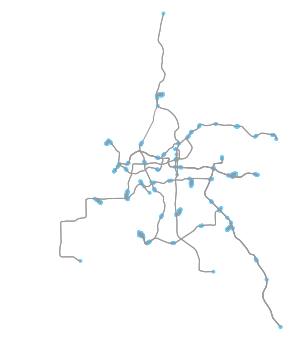

(<matplotlib.figure.Figure at 0x7d16eb8>,
 <matplotlib.axes._subplots.AxesSubplot at 0xc5732e8>)

In [49]:
ox.plot_graph(ox.project_graph(G_metro_gz))

In [4]:
ox.basic_stats(G_metro_gz)

{'circuity_avg': 1.0921441420005751,
 'count_intersections': 781,
 'edge_density_km': None,
 'edge_length_avg': 416.43722785033151,
 'edge_length_total': 1090232.6625121678,
 'intersection_density_km': None,
 'k_avg': 4.541196877710321,
 'm': 2618,
 'n': 1153,
 'node_density_km': None,
 'self_loop_proportion': 0.0,
 'street_density_km': None,
 'street_length_avg': 489.25690306693991,
 'street_length_total': 663921.61746183748,
 'street_segments_count': 1357,
 'streets_per_node_avg': 2.3538594969644406,
 'streets_per_node_counts': {0: 0, 1: 372, 2: 14, 3: 754, 4: 13},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.3226366001734605,
  2: 0.012142237640936688,
  3: 0.6539462272333044,
  4: 0.011274934952298352}}

In [25]:
df = [data  for (k1,k2,i,data) in G_metro_gz.edges(keys=True,data=True)]


In [27]:
geo_metro =pd.DataFrame(df)
geo_metro.head(2)

,area,bridge,geometry,length,name,oneway,osmid,service,tunnel
0,NaN,NaN,"LINESTRING (113.2252366 23.0797834, 113.225153...",335.468597,NaN,False,180374981,yard,NaN
1,NaN,NaN,"LINESTRING (113.2268768 23.0668602, 113.226498...",214.030206,NaN,False,180374981,yard,NaN


In [37]:
pd.notnull(geo_metro['name'][0])

False

In [40]:
geo_metro=geo_metro.loc[pd.notnull(geo_metro['name'])]
geo_metro.head(2)

,area,bridge,geometry,length,name,oneway,osmid,service,tunnel
11,NaN,viaduct,"LINESTRING (113.2094152 23.1243125, 113.209150...",874.472297,广州地铁5号线,False,283046757,NaN,NaN
12,NaN,viaduct,"LINESTRING (113.2094152 23.1243125, 113.209618...",2210.440926,广州地铁5号线,False,"[502283460, 283046757, 424239990]",NaN,yes


In [48]:
G_metro_gz.edges(keys=True, data=True)

[(1908209585,
  3977831844,
  0,
  {'geometry': <shapely.geometry.linestring.LineString at 0xfbc6748>,
   'length': 335.46859685980496,
   'oneway': False,
   'osmid': 180374981,
   'service': 'yard'}),
 (1908209592,
  2406628092,
  0,
  {'geometry': <shapely.geometry.linestring.LineString at 0xfbc6860>,
   'length': 214.03020557181142,
   'oneway': False,
   'osmid': 180374981,
   'service': 'yard'}),
 (1908209601,
  3977831811,
  0,
  {'length': 25.244436386255462,
   'oneway': False,
   'osmid': 485623808,
   'service': 'yard'}),
 (1908209601,
  3977831825,
  0,
  {'geometry': <shapely.geometry.linestring.LineString at 0xfbc6908>,
   'length': 68.231253813813694,
   'oneway': False,
   'osmid': 394890831,
   'service': 'yard'}),
 (1908209601,
  4784043900,
  0,
  {'geometry': <shapely.geometry.linestring.LineString at 0xfbc62b0>,
   'length': 69.971148484427985,
   'oneway': False,
   'osmid': 485623808,
   'service': 'yard'}),
 (1908209617,
  2353152168,
  0,
  {'geometry': <shapel